In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get allele specific expression

In [2]:
#get allele specific expression dataframe
ase=pd.read_csv("/cellar/users/andreabc/Data/TCGA/hla_types/filtered_top2_RNA_HLA_TPM.txt",delimiter="\t",comment="#")

In [3]:
uuid=pd.read_csv("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/uuid_barcode_map.txt",delimiter="\t")
mp_uuid=dict(zip(uuid["file_id"],uuid["sample_barcode"]))

In [4]:
ase["Unnamed: 0"]=ase["Unnamed: 0"].map(mp_uuid)

In [5]:
ase["code"]=ase["Unnamed: 0"].str.split("-").str[3]
ase_tumor=ase[ase["code"].str.contains("01")]

In [6]:
del ase_tumor["code"]

In [7]:
ase_exp=ase_tumor.copy()

for x in ase_exp.columns[1:]:
    ase_exp[x] = ase_exp[x].str.split(" ").str[1]
    ase_exp[x] = ase_exp[x].str.split(")").str[0]

In [8]:
ase_exp=ase_exp.rename(columns={"Unnamed: 0":"FID"})

In [9]:
ase_exp["FID"]=ase_exp["FID"].str[0:12]

In [10]:
genes=["HLA-A","HLA-B","HLA-C","HLA-DPA1","HLA-DPB1","HLA-DRB1","HLA-DQA1","HLA-DQB1"]

In [11]:
for x in genes:
    ase_exp[x]=(ase_exp[x+"_1"].astype(float)+ase_exp[x+"_2"].astype(float))/2
    ase_exp[x+".count"]=ase_exp[[x+"_1",x+"_2"]].apply(lambda x: x.count(), axis=1)

In [12]:
#map to cancer type
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()
ase_exp["cancer"]=ase_exp["FID"].map(mp)

In [13]:
for x in ase_exp["cancer"].unique():
    try:
        tumor=ase_exp[ase_exp["cancer"]==x]
        tumor=tumor[["FID"]+genes]
        tumor.to_csv("/cellar/users/mpagadal/Data/projects/germline-immune/hla-deep-dive/phenotypes/hla-ase/avg/pheno_"+x+".unnorm.csv",index=None,sep="\t")
    except:
        pass

In [14]:
compiled=pd.DataFrame()
for x in ase_exp["cancer"].unique().tolist():
    try:
        df=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/hla-deep-dive/phenotypes/hla-ase/avg/pheno_"+x+".rank.csv",delimiter="\t")
        df["cancer"]=x
        compiled=compiled.append(df)
    except:
        pass

In [15]:
del compiled["cancer"]
compiled["IID"]=compiled["FID"]
cols=["FID","IID"]+compiled.columns.tolist()[1:-1]
compiled=compiled[cols]
compiled.columns=[x.replace("-",".") for x in compiled.columns]
compiled.columns=[x.replace("_",".") for x in compiled.columns]
compiled=compiled.fillna(-9)

In [16]:
compiled.to_csv("/cellar/users/mpagadal/Data/projects/germline-immune/hla-deep-dive/phenotypes/hla-ase/avg/pheno_all_zcancer",index=None,sep="\t")

In [9]:
ase

,Unnamed: 0,HLA-A_1,HLA-A_2,HLA-B_1,HLA-B_2,HLA-C_1,HLA-C_2,HLA-DPA1_1,HLA-DPB1_1,HLA-DRB1_1,HLA-DQA1_1,HLA-DQB1_1,HLA-DPA1_2,HLA-DPB1_2,HLA-DRB1_2,HLA-DQA1_2,HLA-DQB1_2,code
0,TCGA-2G-AAGG-01A,"('HLA-A01:01:01', 40836.7)","('HLA-A11:01:01', 20076.9)","('HLA-B08:01:01', 50297.5)","('HLA-B35:01:01', 28237.5)","('HLA-C07:01:01', 27602.7)","('HLA-C04:01:01', 21220.5)","('HLA-DPA102:01:02', 6424.15)","('HLA-DPB101:01:01', 9287.22)","('HLA-DRB103:01:01', 20246.2)","('HLA-DQA105:01:01', 6404.75)","('HLA-DQB102:01:01', 2120.39)",NaN,NaN,NaN,NaN,NaN,01A
1,TCGA-WC-A87T-01A,"('HLA-A03:01:01:01', 9683.87)","('HLA-A29:02:01', 2414.58)","('HLA-B44:03:01', 4201.47)",NaN,"('HLA-C16:01:01', 6625.01)",NaN,"('HLA-DPA101:03:01', 271.375)","('HLA-DPB111:01:01', 591.653)","('HLA-DRB103:01:01', 459.273)","('HLA-DQA105:01:01', 58.6934)","('HLA-DQB102:01:01', 36.0792)","('HLA-DPA102:01:01', 191.794)","('HLA-DPB103:01:01', 405.466)","('HLA-DRB107:01:01', 410.733)","('HLA-DQA102:01:01', 44.261)","('HLA-DQB102:02:01', 24.9773)",01A
2,TCGA-CN-4727-01A,"('HLA-A26:01:01:01', 48625.1)","('HLA-A02:01:01', 30654.8)","('HLA-B45:01:01', 49942.3)","('HLA-B44:02:01:01', 21939.7)","('HLA-C06:02:01', 21772.4)","('HLA-C05:01:01', 9329.15)","('HLA-DPA101:03:01', 538.4830000000001)","('HLA-DPB104:01:01', 336.19)","('HLA-DRB107:01:01', 730.148)","('HLA-DQA105:05:01', 193.99200000000002)","('HLA-DQB103:01:01', 154.109)",NaN,"('HLA-DPB104:02:01', 276.973)","('HLA-DRB112:01:01', 691.683)","('HLA-DQA102:01:01', 184.817)","('HLA-DQB102:02:01', 105.37799999999999)",01A
3,TCGA-CV-5431-01A,"('HLA-A24:02:01', 17591.7)","('HLA-A23:01:01', 11115.2)","('HLA-B08:01:01', 19258.5)","('HLA-B49:01:01', 14052.2)","('HLA-C07:01:01', 15044.9)",NaN,"('HLA-DPA101:03:01', 5421.09)","('HLA-DPB104:01:01', 2682.29)","('HLA-DRB103:01:01', 7079.67)","('HLA-DQA105:01:01', 3864.88)","('HLA-DQB106:04:01', 2427.39)",NaN,"('HLA-DPB102:01:02', 2549.96)","('HLA-DRB113:02:01', 6015.52)","('HLA-DQA101:02:01', 2656.56)","('HLA-DQB102:01:01', 1074.36)",01A
4,TCGA-53-7626-01A,"('HLA-A32:01:01', 23820.5)",NaN,"('HLA-B15:18:01', 28675.8)","('HLA-B40:02:01', 15108.1)","('HLA-C07:04:01', 16787.8)","('HLA-C02:02:02', 10317.3)","('HLA-DPA101:03:01', 23966.7)","('HLA-DPB103:01:01', 17595.8)","('HLA-DRB113:01:01', 43212.9)","('HLA-DQA101:03:01', 13889.1)","('HLA-DQB106:03:01', 17547.7)",NaN,"('HLA-DPB104:01:01', 5866.72)","('HLA-DRB108:01:01', 18601.2)","('HLA-DQA104:01:01', 9318.69)","('HLA-DQB104:02:01', 4619.26)",01A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,TCGA-BJ-A0ZJ-01A,"('HLA-A11:01:01', 30655.9)","('HLA-A01:01:01', 26646.7)","('HLA-B44:02:01:01', 32668.7)","('HLA-B08:01:01', 32271.1)","('HLA-C05:01:01', 16857.8)","('HLA-C07:01:01', 14267.4)","('HLA-DPA101:03:01', 16036.4)","('HLA-DPB103:01:01', 8184.6)","('HLA-DRB104:01:01', 15693.0)","('HLA-DQA103:03:01', 6020.13)","('HLA-DQB106:02:01', 7540.36)",NaN,"('HLA-DPB104:01:01', 6249.88)","('HLA-DRB115:01:01', 13433.6)","('HLA-DQA101:02:01', 3203.06)","('HLA-DQB103:01:01', 4985.0)",01A
10933,TCGA-77-8009-01A,"('HLA-A11:01:01', 18179.7)","('HLA-A11:303', 7410.59)","('HLA-B52:01:01', 27185.1)",NaN,"('HLA-C12:02:02', 13956.4)","('HLA-C15:02:01:01', 4075.95)","('HLA-DPA102:01:01', 1590.28)","('HLA-DPB117:01:01', 1549.81)","('HLA-DRB115:02:01', 3559.7)","('HLA-DQA101:03:01', 2062.91)","('HLA-DQB106:01:01', 1145.7)","('HLA-DPA102:07:01', 1272.88)","('HLA-DPB104:01:01', 1137.7)","('HLA-DRB107:01:01', 3519.28)","('HLA-DQA102:01:01', 1266.44)","('HLA-DQB102:02:01', 681.5189999999999)",01A
10934,TCGA-DX-A8BJ-01A,"('HLA-A03:01:01:01', 14099.8)","('HLA-A03:350', 2973.28)","('HLA-B38:01:01', 14237.9)","('HLA-B15:18:01', 3838.32)","('HLA-C12:03:01', 13217.8)","('HLA-C07:04:01', 2253.57)","('HLA-DPA101:03:01', 5827.75)","('HLA-DPB104:02:01', 3203.11)","('HLA-DRB103:01:01', 8352.95)","('HLA-DQA101:03:01', 1860.62)","('HLA-DQB106:03:01', 2196.46)",NaN,"('HLA-DPB1126:01:01', 2971.28)","('HLA-DRB113:01:01', 8348.92)","('HLA-DQA105:01:01', 85

## Check mismatch rates of HLA type calls

### get polysolver data

In [2]:
polysolver_mhcI=pd.read_csv("/cellar/users/andreabc/Data/TCGA/hla_types/all_mhc_i_types.txt",delimiter="\t")
polysolver_mhcII=pd.read_csv("/cellar/users/andreabc/Data/TCGA/hla_types/all_mhc_ii_types.csv",delimiter=",")

In [3]:
polysolver=pd.merge(polysolver_mhcI,polysolver_mhcII,on="Unnamed: 0",how="outer")

In [5]:
polysolver_mhcII

,Unnamed: 0,DRB1_1,DRB1_1.1,DRB1_2,DRB1_2.1,HLA-DPA1_1-DPB1_1,HLA-DPA1_1-DPB1_2,HLA-DPA1_2-DPB1_1,HLA-DPA1_2-DPB1_2,HLA-DQA1_1-DQB1_1,HLA-DQA1_1-DQB1_2,HLA-DQA1_2-DQB1_1,HLA-DQA1_2-DQB1_2
0,TCGA-02-0003,DRB1_1501,DRB1_1501,DRB1_0401,DRB1_0401,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10201,HLA-DQA10102-DQB10602,HLA-DQA10102-DQB10301,HLA-DQA10303-DQB10602,HLA-DQA10303-DQB10301
1,TCGA-02-0033,DRB1_1104,DRB1_1104,DRB1_0404,DRB1_0404,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10402,HLA-DQA10505-DQB10302,HLA-DQA10505-DQB10301,HLA-DQA10301-DQB10302,HLA-DQA10301-DQB10301
2,TCGA-02-0047,DRB1_0301,DRB1_0301,DRB1_0401,DRB1_0401,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB11501,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB11501,HLA-DQA10301-DQB10201,HLA-DQA10301-DQB10302,HLA-DQA10501-DQB10201,HLA-DQA10501-DQB10302
3,TCGA-02-0055,DRB1_1101,DRB1_1101,DRB1_0407,DRB1_0407,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10401,HLA-DQA10505-DQB10301,HLA-DQA10505-DQB10301,HLA-DQA10301-DQB10301,HLA-DQA10301-DQB10301
4,TCGA-02-2466,DRB1_0301,DRB1_0301,DRB1_0101,DRB1_0101,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10401,HLA-DQA10501-DQB10501,HLA-DQA10501-DQB10201,HLA-DQA10101-DQB10501,HLA-DQA10101-DQB10201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,TCGA-29-2432,DRB1_1501,DRB1_1501,DRB1_0301,DRB1_0301,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DQA10501-DQB10201,HLA-DQA10501-DQB10602,HLA-DQA10102-DQB10201,HLA-DQA10102-DQB10602
8234,TCGA-29-1762,DRB1_0301,DRB1_0301,DRB1_1104,DRB1_1104,HLA-DPA10103-DPB116201,HLA-DPA10103-DPB170201,HLA-DPA10201-DPB116201,HLA-DPA10201-DPB170201,HLA-DQA10505-DQB10301,HLA-DQA10505-DQB10201,HLA-DQA10601-DQB10301,HLA-DQA10601-DQB10201
8235,TCGA-DF-A2KS,DRB1_1104,DRB1_1104,DRB1_0804,DRB1_0804,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10201,HLA-DQA10401-DQB10402,HLA-DQA10401-DQB10301,HLA-DQA10505-DQB10402,HLA-DQA10505-DQB10301
8236,TCGA-L5-A43H,DRB1_1501,DRB1_1501,DRB1_0301,DRB1_0301,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10401,HLA-DQA10501-DQB10602,HLA-DQA10501-DQB10201,HLA-DQA10102-DQB10602,HLA-DQA10102-DQB10201


In [4]:
for x in polysolver.columns[11:]:
    print(x)
    col1=x.split("-")[0]+"-"+x.split("-")[1]
    polysolver[col1]=polysolver[x].str.split("-").str[0]+"-"+polysolver[x].str.split("-").str[1]
    
    col2=x.split("-")[0]+"-"+x.split("-")[2]
    polysolver[col2]=polysolver[x].str.split("-").str[0]+"-"+polysolver[x].str.split("-").str[2]
    
    del polysolver[x]

HLA-DPA1_1-DPB1_1
HLA-DPA1_1-DPB1_2
HLA-DPA1_2-DPB1_1
HLA-DPA1_2-DPB1_2
HLA-DQA1_1-DQB1_1
HLA-DQA1_1-DQB1_2
HLA-DQA1_2-DQB1_1
HLA-DQA1_2-DQB1_2


In [5]:
for x in polysolver.columns[7:11]:
    polysolver[x]="HLA"+polysolver[x]

In [6]:
for x in polysolver.columns[1:]:
    print(x)
    polysolver[x]=polysolver[x].str.replace(":","")
    polysolver[x]=polysolver[x].str.replace("-","")
    polysolver[x]=polysolver[x].str.replace("_","")
    polysolver[x]=polysolver[x].str[0:8]

HLA-A1
HLA-A2
HLA-B1
HLA-B2
HLA-C1
HLA-C2
DRB1_1
DRB1_1.1
DRB1_2
DRB1_2.1
HLA-DPA1_1
HLA-DPB1_1
HLA-DPB1_2
HLA-DPA1_2
HLA-DQA1_1
HLA-DQB1_1
HLA-DQB1_2
HLA-DQA1_2


In [7]:
mp_poly={"HLA-A1":"HLA-A","HLA-A2":"HLA-A","HLA-B1":"HLA-B","HLA-B2":"HLA-B","HLA-C1":"HLA-C","HLA-C2":"HLA-C","DRB1_1":"HLA-DRB1_1","DRB1_1.1":"HLA-DRB1_1","DRB1_2":"HLA-DRB1_2","DRB1_2.1":"HLA-DRB1_2"}
polysolver=polysolver.rename(columns=mp_poly)

### Get ASE data

In [4]:
ase=pd.read_csv("/cellar/users/andreabc/Data/TCGA/hla_types/filtered_top2_RNA_HLA_TPM.txt",delimiter="\t",comment="#")

In [5]:
uuid=pd.read_csv("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/uuid_barcode_map.txt",delimiter="\t")

In [6]:
mp_uuid=dict(zip(uuid["file_id"],uuid["sample_barcode"]))

In [7]:
ase["TCGA"]=ase["Unnamed: 0"].map(mp_uuid)

In [8]:
ase["Unnamed: 0"]=ase["TCGA"]
del ase["TCGA"]

In [9]:
ase_exp=ase.copy()

for x in ase_exp.columns[1:]:
    ase_exp[x] = ase_exp[x].str.split(" ").str[1]
    ase_exp[x] = ase_exp[x].str.split(")").str[0]

In [10]:
ase_exp=ase_exp.rename(columns={"Unnamed: 0":"FID"})

In [11]:
ase_exp["code"]=ase_exp["FID"].str.split("-").str[3]

In [12]:
ase_exp["code"].value_counts()

01A    9534
11A     712
06A     363
01B     142
03A     136
11B      17
03B      15
02A       9
01C       5
06B       2
11C       1
05A       1
Name: code, dtype: int64

In [59]:
ase_exp_tumor=ase_exp[ase_exp["code"].str.contains("01")]

In [60]:
ase_exp_tumor[ase_exp_tumor["FID"].duplicated()]

,FID,HLA-A_1,HLA-A_2,HLA-B_1,HLA-B_2,HLA-C_1,HLA-C_2,HLA-DPA1_1,HLA-DPB1_1,HLA-DRB1_1,HLA-DQA1_1,HLA-DQB1_1,HLA-DPA1_2,HLA-DPB1_2,HLA-DRB1_2,HLA-DQA1_2,HLA-DQB1_2,code


In [61]:
ase_exp_tumor["FID"]=ase_exp_tumor["FID"].str[0:12]

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
genes=["HLA-A","HLA-B","HLA-C","HLA-DPA1","HLA-DPB1","HLA-DRB1","HLA-DQA1","HLA-DQB1"]

In [65]:

for x in genes:
    ase_exp_tumor[x]=ase_exp_tumor[x+"_1"].astype(float)+ase_exp_tumor[x+"_2"].astype(float)
    ase_exp_tumor[x+".count"]=ase_exp_tumor[[x+"_1",x+"_2"]].apply(lambda x: x.count(), axis=1)

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()
#total['cancer'] = total["FID"].map(mp)
ase_exp_tumor["cancer"]=ase_exp_tumor["FID"].map(mp)

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
ase_exp_tumor[["FID"]+genes]

,FID,HLA-A,HLA-B,HLA-C,HLA-DPA1,HLA-DPB1,HLA-DRB1,HLA-DQA1,HLA-DQB1
0,TCGA-2G-AAGG,60913.60,78535.00,48823.20,NaN,NaN,NaN,NaN,NaN
1,TCGA-WC-A87T,12098.45,NaN,NaN,463.169,997.119,870.006,102.9544,61.0565
2,TCGA-CN-4727,79279.90,71882.00,31101.55,NaN,613.163,1421.831,378.8090,259.4870
3,TCGA-CV-5431,28706.90,33310.70,NaN,NaN,5232.250,13095.190,6521.4400,3501.7500
4,TCGA-53-7626,NaN,43783.90,27105.10,NaN,23462.520,61814.100,23207.7900,22166.9600
...,...,...,...,...,...,...,...,...,...
10930,TCGA-QS-A5YQ,64907.70,62951.10,48260.60,2057.327,4928.980,13312.090,1319.8430,3612.3000
10931,TCGA-D1-A17T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10932,TCGA-BJ-A0ZJ,57302.60,64939.80,31125.20,NaN,14434.480,29126.600,9223.1900,12525.3600
10933,TCGA-77-8009,25590.29,NaN,18032.35,2863.160,2687.510,7078.980,3329.3500,1827.2190


In [73]:
for x in ase_exp_tumor["cancer"].unique():
    try:
        tumor=ase_exp_tumor[ase_exp_tumor["cancer"]==x]
        tumor=tumor[["FID"]+genes]
        tumor.to_csv("/cellar/users/mpagadal/Data/projects/germline-immune/processed_phenos/hla-ase/pheno_"+x+".unnorm.csv",index=None,sep="\t")
    except:
        pass

In [74]:
compiled=pd.DataFrame()
for x in ase_exp_tumor["cancer"].unique().tolist():
    try:
        df=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/processed_phenos/hla-ase/pheno_"+x+".rank.csv",delimiter="\t")
        df["cancer"]=x
        compiled=compiled.append(df)
    except:
        pass

Text(0.5, 1.0, 'HLA.A')

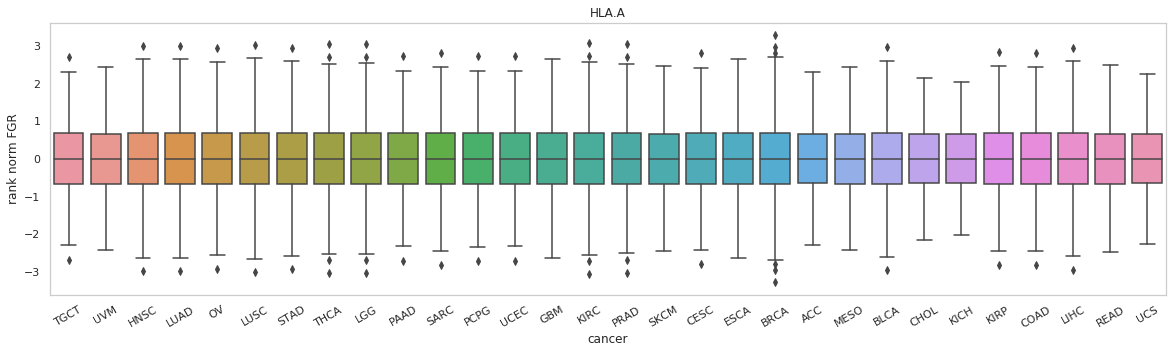

In [76]:
x="HLA.A"
#plot rna expression by cancer type
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(20,5))
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x="cancer", y=x, data=compiled)
ax.set(xlabel="cancer", ylabel='rank norm FGR')
plt.xticks(rotation=30)
plt.title(x)

In [77]:
del compiled["cancer"]
compiled["IID"]=compiled["FID"]
cols=["FID","IID"]+compiled.columns.tolist()[1:-1]
compiled=compiled[cols]
compiled.columns=[x.replace("-",".") for x in compiled.columns]
compiled.columns=[x.replace("_",".") for x in compiled.columns]
compiled=compiled.fillna(-9)

In [78]:
compiled.to_csv("/cellar/users/mpagadal/Data/projects/germline-immune/processed_phenos/hla-ase/pheno_all_zcancer",index=None,sep="\t")

In [79]:
len(compiled.columns[2:].tolist())

8

In [81]:
" ".join(compiled.columns[2:].tolist())

'HLA.A HLA.B HLA.C HLA.DPA1 HLA.DPB1 HLA.DRB1 HLA.DQA1 HLA.DQB1'

In [27]:
compiled.head()

,FID,IID,HLA.A.1,HLA.A.2,HLA.B.1,HLA.B.2,HLA.C.1,HLA.C.2,HLA.DPA1.1,HLA.DPB1.1,HLA.DRB1.1,HLA.DQA1.1,HLA.DQB1.1,HLA.DPA1.2,HLA.DPB1.2,HLA.DRB1.2,HLA.DQA1.2,HLA.DQB1.2,code
1,TCGA-2G-AAGG,TCGA-2G-AAGG,2.128045,1.755717,2.713052,2.297632,2.128045,2.660067,0.403383,1.382994,1.191816,0.760984,-0.244728,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-0.008356
2,TCGA-2G-AAGX,TCGA-2G-AAGX,0.738847,-9.000000,-0.695620,-0.407755,-0.612813,-0.247285,-0.092039,0.075270,-0.829774,-0.877896,-0.806421,-9.000000,-9.000000,-0.645201,-0.725323,-1.399916,-0.008356
3,TCGA-ZM-AA0D,TCGA-ZM-AA0D,0.695620,1.435730,-0.008356,0.447275,-0.176374,-0.107916,1.158484,1.126391,1.475791,0.954165,1.475791,-9.000000,-9.000000,1.937932,0.508488,1.399916,-0.008356
4,TCGA-2G-AAGP,TCGA-2G-AAGP,1.475791,1.545182,1.008252,1.755717,1.158484,1.717228,0.159426,0.477040,0.717066,0.674490,0.159426,0.274978,0.785427,0.957439,0.699680,0.774794,-0.008356
5,TCGA-YU-A90Y,TCGA-YU-A90Y,0.928143,0.750029,0.534012,0.255210,0.783500,0.227143,0.592773,1.427856,0.514837,0.159426,-0.296738,-9.000000,-9.000000,0.427283,-0.069685,0.469851,-0.008356


### compare RNA expression

In [28]:
brian=pd.read_csv("../processed_phenos/brian-tpm/tumor/pheno_all_zcancer",delimiter="\t")

In [31]:
cols=[x for x in brian.columns if "HLA" in x]

In [34]:
all_hla=pd.merge(compiled,brian[["FID"]+cols],on="FID",suffixes=("_ase","_tpm"))

In [37]:
all_hla.columns

Index(['FID', 'IID', 'HLA.A.1', 'HLA.A.2', 'HLA.B.1', 'HLA.B.2', 'HLA.C.1',
       'HLA.C.2', 'HLA.DPA1.1', 'HLA.DPB1.1', 'HLA.DRB1.1', 'HLA.DQA1.1',
       'HLA.DQB1.1', 'HLA.DPA1.2', 'HLA.DPB1.2', 'HLA.DRB1.2', 'HLA.DQA1.2',
       'HLA.DQB1.2', 'code', 'HLA.DQA1', 'HLA.DRB5', 'HLA.DRB1', 'HLA.DQB1',
       'HLA.C', 'HLA.A', 'HLA.E', 'HLA.DRB3', 'HLA.B', 'HLA.DPA1', 'HLA.F',
       'HLA.DMB', 'HLA.DMA', 'HLA.DQA2'],
      dtype='object')

In [61]:
x="HLA.DPA1.1"
y="HLA.DPA1"

In [62]:
all_hla_clean=all_hla[(all_hla[x]!=-9)&(all_hla[y]!=-9)]

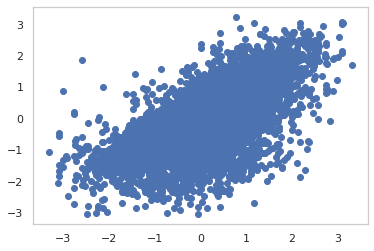

In [63]:
plt.scatter(all_hla_clean[x],all_hla_clean[y])

In [338]:
ase=ase.fillna("")

In [339]:
ase_types=ase.copy()

for x in ase_types.columns[1:]:
    ase_types[x] = ase_types[x].str.split("'").str[1]

In [340]:
for x in ase_types.columns[1:]:
    print(x)
    ase_types[x]=ase_types[x].str.replace(":","")
    ase_types[x]=ase_types[x].str.replace("-","")
    ase_types[x]=ase_types[x].str.replace("_","")
    ase_types[x]=ase_types[x].str[0:8]

HLA-A_1
HLA-A_2
HLA-B_1
HLA-B_2
HLA-C_1
HLA-C_2
HLA-DPA1_1
HLA-DPB1_1
HLA-DRB1_1
HLA-DQA1_1
HLA-DQB1_1
HLA-DPA1_2
HLA-DPB1_2
HLA-DRB1_2
HLA-DQA1_2
HLA-DQB1_2


In [341]:
mp_ase={"HLA-A_1":"HLA-A","HLA-A_2":"HLA-A","HLA-B_1":"HLA-B","HLA-B_2":"HLA-B","HLA-C_1":"HLA-C","HLA-C_2":"HLA-C"}

In [342]:
ase_types=ase_types.rename(columns=mp_ase)

In [343]:
ase_types.head()

,Unnamed: 0,HLA-A,HLA-A,HLA-B,HLA-B,HLA-C,HLA-C,HLA-DPA1_1,HLA-DPB1_1,HLA-DRB1_1,HLA-DQA1_1,HLA-DQB1_1,HLA-DPA1_2,HLA-DPB1_2,HLA-DRB1_2,HLA-DQA1_2,HLA-DQB1_2
0,TCGA-2G-AAGG,HLAA0101,HLAA1101,HLAB0801,HLAB3501,HLAC0701,HLAC0401,HLADPA10,HLADPB10,HLADRB10,HLADQA10,HLADQB10,NaN,NaN,NaN,NaN,NaN
1,TCGA-WC-A87T,HLAA0301,HLAA2902,HLAB4403,NaN,HLAC1601,NaN,HLADPA10,HLADPB11,HLADRB10,HLADQA10,HLADQB10,HLADPA10,HLADPB10,HLADRB10,HLADQA10,HLADQB10
2,TCGA-CN-4727,HLAA2601,HLAA0201,HLAB4501,HLAB4402,HLAC0602,HLAC0501,HLADPA10,HLADPB10,HLADRB10,HLADQA10,HLADQB10,NaN,HLADPB10,HLADRB11,HLADQA10,HLADQB10
3,TCGA-CV-5431,HLAA2402,HLAA2301,HLAB0801,HLAB4901,HLAC0701,NaN,HLADPA10,HLADPB10,HLADRB10,HLADQA10,HLADQB10,NaN,HLADPB10,HLADRB11,HLADQA10,HLADQB10
4,TCGA-53-7626,HLAA3201,NaN,HLAB1518,HLAB4002,HLAC0704,HLAC0202,HLADPA10,HLADPB10,HLADRB11,HLADQA10,HLADQB10,NaN,HLADPB10,HLADRB10,HLADQA10,HLADQB10


## Merge files

In [397]:
hla_types=pd.merge(ase_types,polysolver,on="Unnamed: 0",suffixes=('_ase', '_poly'))

In [398]:
cols=[x for x in ase_types.columns[1:]]

In [399]:
for x in set(cols):
    print(x)
    hla_ase=hla_types[[x+"_ase"]].apply(lambda x: list(x), axis=1)
    hla_poly=hla_types[[x+"_poly"]].apply(lambda x: list(x), axis=1)
    hla_types[x+"_overlap"]=[len(set(a).intersection(b)) for a, b in zip(hla_ase,hla_poly)]
    total=pd.DataFrame(hla_ase).apply(lambda x: len(list(x)), axis=1)

    hla_types[x+"_overlap"]=hla_types[x+"_overlap"].astype(float)/int(total.values[0])
    

HLA-DPB1_2
1
HLA-B
1
HLA-DPA1_2
1
HLA-DPB1_1
1
HLA-DQB1_1
1
HLA-DQA1_1
1
HLA-DRB1_1
1
HLA-DRB1_2
1
HLA-DQA1_2
1
HLA-DQB1_2
1
HLA-C
1
HLA-A
1
HLA-DPA1_1
1


In [403]:
overlap_cols=[x for x in hla_types.columns if "overlap" in x]

In [406]:
df_compiled=pd.DataFrame()

for x in overlap_cols:
    df=hla_types[x].value_counts().reset_index()
    df.columns=["overlap","number"]
    df["pheno"]=x.split("_overlap")[0]
    df_compiled=df_compiled.append(df)

In [411]:
df_compiled["pheno"].unique()

array(['HLA-DPB1_2', 'HLA-B', 'HLA-DPA1_2', 'HLA-DPB1_1', 'HLA-DQB1_1',
       'HLA-DQA1_1', 'HLA-DRB1_1', 'HLA-DRB1_2', 'HLA-DQA1_2',
       'HLA-DQB1_2', 'HLA-C', 'HLA-A', 'HLA-DPA1_1'], dtype=object)

In [413]:
ind=[]
zero=[]
first=[]
second=[]

for x in df_compiled["pheno"].unique():
    ind.append(x)
    try:
        zero.append(df_compiled[(df_compiled["pheno"]==x)&(df_compiled["overlap"]==0)]["number"].values[0])
    except:
        zero.append(0)
    try:
        first.append(df_compiled[(df_compiled["pheno"]==x)&(df_compiled["overlap"]==1)]["number"].values[0])
    except:
        first.append(0)
    try:
        second.append(df_compiled[(df_compiled["pheno"]==x)&(df_compiled["overlap"]==2)]["number"].values[0])
    except:
        second.append(0)
    

In [421]:
list(np.add(zero,first))

[10455,
 2856,
 10455,
 10455,
 10455,
 10455,
 10455,
 10455,
 10455,
 10455,
 3180,
 5273,
 10455]

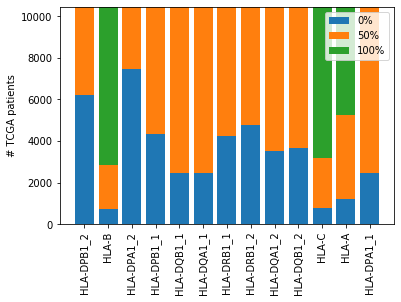

In [430]:
p1 = plt.bar(ind, zero,label="0%")
p2 = plt.bar(ind, first, bottom=zero,label="50%")
p3 = plt.bar(ind, second, bottom=list(np.add(zero,first)),label="100%")

plt.legend()
plt.xticks(rotation=90)
plt.ylabel("# TCGA patients")
plt.show()

In [431]:
s="SRR5134765 SRR2648146 SRR3341196 SRR2648106 SRR5134821 SRR5134826 SRR5134896 SRR5134908 SRR2648160 SRR5134810 SRR2648110 SRR5134840 SRR5134831 SRR5134763 SRR3341234 SRR2648132 SRR3341186 SRR5134919 SRR3341290 SRR3341282 SRR5134769 SRR5134794 SRR2648154 SRR3341218 SRR3341168 SRR3341262 SRR5134870 SRR5134822 SRR2648156 SRR3341286 SRR2648144 SRR5134815 SRR3341250 SRR2648138 SRR5134788 SRR5134898 SRR2648102 SRR5134806 SRR3341180 SRR2648130 SRR5134837 SRR5134877 SRR5134825 SRR5134775 SRR2648152 SRR5134865 SRR2648112 SRR3341228 SRR2648108 SRR3341270 SRR5134915 SRR2648168 SRR3341278 SRR2648162 SRR3341188 SRR5134791 SRR5134805 SRR3341284 SRR3341274 SRR5134760 SRR3341248 SRR5134850 SRR3341192 SRR3341256 SRR3341272 SRR3341212 SRR3341172 SRR5134787 SRR3341184 SRR3341206 SRR3341174 SRR3341220 SRR3341244 SRR5134912 SRR2648166 SRR2648134 SRR2648104 SRR5134797 SRR5134781 SRR3341232 SRR5134780 SRR5134800 SRR5134796 SRR2648118 SRR2648122 SRR5134811 SRR3341266 SRR2648142 SRR3341236 SRR3341246 SRR5134893 SRR5134900 SRR5134819 SRR5134747 SRR5134860 SRR3341258 SRR2648126 SRR3341216 SRR5134798 SRR5134814 SRR2648114 SRR5134752 SRR3341178 SRR3341204 SRR3341202 SRR5134823 SRR3341280 SRR3341242 SRR2648116 SRR2648148 SRR5134772 SRR3341194 SRR2648158 SRR3341252 SRR5134852 SRR5134779 SRR3341260 SRR5134889 SRR2648140 SRR5134832 SRR3341176 SRR5134767 SRR5134892 SRR3341208 SRR5134902 SRR3341288 SRR5134755 SRR5134757 SRR5134829 SRR3341200 SRR2648164 SRR5134855 SRR3341254 SRR3341190 SRR3341170 SRR2648150 SRR5134745 SRR3341276 SRR5134887 SRR3341292 SRR2648136 SRR5134901 SRR5134874 SRR2648124 SRR5134920 SRR5134854 SRR3341214 SRR3341240 SRR3341198 SRR5134756 SRR2648120 SRR3341182 SRR3341294 SRR3341264 SRR3341226 SRR3341222 SRR3341238 SRR5134768 SRR3341230 SRR5134861 SRR3341224 SRR3341210 SRR5134809 SRR3341268 SRR5134885 SRR2648128"

In [434]:
len(s.split(" "))

166

In [436]:
n=df_pca.index.unique()
color=iter(cm.rainbow(np.linspace(0,1,len(n))))

NameError: name 'df_pca' is not defined

In [382]:
cols=[x for x in set([x for x in hla_types.columns if "HLA-DQA1_1" in x])]

In [383]:
hla_types[cols]

,HLA-DQA1_1_poly,HLA-DQA1_1_overlap,HLA-DQA1_1_ase
0,HLADQA10,1,HLADQA10
1,HLADQA10,1,HLADQA10
2,HLADQA10,1,HLADQA10
3,HLADQA10,1,HLADQA10
4,HLADQA10,1,HLADQA10
...,...,...,...
10450,HLADQA10,1,HLADQA10
10451,NaN,0,NaN
10452,HLADQA10,1,HLADQA10
10453,NaN,0,HLADQA10


In [356]:
hla_types[["HLA-A_poly"]].apply(lambda x: list(x), axis=1)

0        [HLAA1101, HLAA0101]
1        [HLAA0301, HLAA2902]
2        [HLAA0201, HLAA2601]
3                  [nan, nan]
4        [HLAA0201, HLAA3201]
                 ...         
10450    [HLAA8001, HLAA3301]
10451    [HLAA2402, HLAA2601]
10452    [HLAA0101, HLAA1101]
10453    [HLAA1101, HLAA1101]
10454    [HLAA0301, HLAA0201]
Length: 10455, dtype: object

In [359]:
[len(set(a).intersection(b)) for a, b in zip(hla_types[["HLA-A_ase"]].apply(lambda x: list(x), axis=1), hla_types[["HLA-A_poly"]].apply(lambda x: list(x), axis=1))]

[2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,


In [360]:
hla_types[["HLA-A_poly"]].apply(lambda x: len(list(x)), axis=1)

0        2
1        2
2        2
3        2
4        2
        ..
10450    2
10451    2
10452    2
10453    2
10454    2
Length: 10455, dtype: int64

In [302]:
cols=[x for x in ase_types.columns[1:]]

In [305]:
hla_types[cols[1]+"_poly"]

,HLA-A_poly,HLA-A_poly
0,HLAA1101,HLAA0101
1,HLAA0301,HLAA2902
2,HLAA0201,HLAA2601
3,NaN,NaN
4,HLAA0201,HLAA3201
...,...,...
10450,HLAA8001,HLAA3301
10451,HLAA2402,HLAA2601
10452,HLAA0101,HLAA1101
10453,HLAA1101,HLAA1101


In [307]:
hla_types[cols[1]+"_ase"]

,HLA-A_ase,HLA-A_ase
0,HLAA010101,HLAA110101
1,HLAA03010101,HLAA290201
2,HLAA26010101,HLAA020101
3,HLAA240201,HLAA230101
4,HLAA320101,NaN
...,...,...
10450,HLAA330101,HLAA800101
10451,NaN,NaN
10452,HLAA110101,HLAA010101
10453,HLAA110101,HLAA11303


In [148]:
polysolver

,Unnamed: 0,HLA-A,HLA-A,HLA-B,HLA-B,HLA-C,HLA-C,HLA-DRB1_1,HLA-DRB1_1,HLA-DRB1_2,HLA-DRB1_2,HLA-DPA1_1,HLA-DPB1_1,HLA-DPB1_2,HLA-DPA1_2,HLA-DQA1_1,HLA-DQB1_1,HLA-DQB1_2,HLA-DQA1_2
0,TCGA-VQ-AA6F,HLA-A01:01,HLA-A02:01,HLA-B13:02,HLA-B15:01,HLA-C06:02,HLA-C03:03,DRB1_1602,DRB1_1602,DRB1_0701,DRB1_0701,HLA-DPA10103,HLA-DPB10402,HLA-DPB10401,HLA-DPA10103,HLA-DQA10201,HLA-DQB10301,HLA-DQB10202,HLA-DQA10503
1,TCGA-YL-A9WX,HLA-A01:01,HLA-A11:01,HLA-B52:01,HLA-B58:01,HLA-C07:06,HLA-C12:02,DRB1_1502,DRB1_1502,DRB1_0701,DRB1_0701,HLA-DPA10201,HLA-DPB10401,HLA-DPB11701,HLA-DPA10103,HLA-DQA10201,HLA-DQB10601,HLA-DQB10202,HLA-DQA10103
2,TCGA-E9-A22G,HLA-A03:01,HLA-A03:01,HLA-B35:03,HLA-B35:01,HLA-C04:01,HLA-C04:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-DB-5275,HLA-A11:01,HLA-A11:01,HLA-B07:02,HLA-B07:02,HLA-C07:02,HLA-C07:02,DRB1_0801,DRB1_0801,DRB1_0701,DRB1_0701,HLA-DPA10103,HLA-DPB10401,HLA-DPB10301,HLA-DPA10103,HLA-DQA10201,HLA-DQB10303,HLA-DQB10402,HLA-DQA10401
4,TCGA-IG-A3YB,HLA-A11:01,HLA-A26:01,HLA-B48:01,HLA-B35:03,HLA-C12:03,HLA-C08:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,TCGA-LUSC-76,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1454,DRB1_1454,DRB1_1454,DRB1_1454,HLA-DPA10103,HLA-DPB11601,HLA-DPB10401,HLA-DPA10103,HLA-DQA10104,HLA-DQB10503,HLA-DQB10503,HLA-DQA10104
10488,TCGA-LUSC-77,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1104,DRB1_1104,DRB1_0301,DRB1_0301,HLA-DPA10103,HLA-DPB10401,HLA-DPB10402,HLA-DPA10103,HLA-DQA10505,HLA-DQB10201,HLA-DQB10301,HLA-DQA10601
10489,TCGA-LUSC-78,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1501,DRB1_1501,DRB1_0301,DRB1_0301,HLA-DPA10201,HLA-DPB10401,HLA-DPB10901,HLA-DPA10103,HLA-DQA10102,HLA-DQB10602,HLA-DQB10201,HLA-DQA10501
10490,TCGA-LUSC-79,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1301,DRB1_1301,DRB1_0701,DRB1_0701,HLA-DPA10103,HLA-DPB10201,HLA-DPB10401,HLA-DPA10103,HLA-DQA10201,HLA-DQB10603,HLA-DQB10202,HLA-DQA10103


In [60]:
polysolver

,Unnamed: 0,HLA-A1,HLA-A2,HLA-B1,HLA-B2,HLA-C1,HLA-C2,DRB1_1,DRB1_1.1,DRB1_2,DRB1_2.1,HLA-DPA1_1-DPB1_1,HLA-DPA1_1-DPB1_2,HLA-DPA1_2-DPB1_1,HLA-DPA1_2-DPB1_2,HLA-DQA1_1-DQB1_1,HLA-DQA1_1-DQB1_2,HLA-DQA1_2-DQB1_1,HLA-DQA1_2-DQB1_2
0,TCGA-VQ-AA6F,HLA-A01:01,HLA-A02:01,HLA-B13:02,HLA-B15:01,HLA-C06:02,HLA-C03:03,DRB1_1602,DRB1_1602,DRB1_0701,DRB1_0701,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10401,HLA-DQA10201-DQB10301,HLA-DQA10201-DQB10202,HLA-DQA10503-DQB10301,HLA-DQA10503-DQB10202
1,TCGA-YL-A9WX,HLA-A01:01,HLA-A11:01,HLA-B52:01,HLA-B58:01,HLA-C07:06,HLA-C12:02,DRB1_1502,DRB1_1502,DRB1_0701,DRB1_0701,HLA-DPA10201-DPB10401,HLA-DPA10201-DPB11701,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB11701,HLA-DQA10201-DQB10601,HLA-DQA10201-DQB10202,HLA-DQA10103-DQB10601,HLA-DQA10103-DQB10202
2,TCGA-E9-A22G,HLA-A03:01,HLA-A03:01,HLA-B35:03,HLA-B35:01,HLA-C04:01,HLA-C04:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-DB-5275,HLA-A11:01,HLA-A11:01,HLA-B07:02,HLA-B07:02,HLA-C07:02,HLA-C07:02,DRB1_0801,DRB1_0801,DRB1_0701,DRB1_0701,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10301,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10301,HLA-DQA10201-DQB10303,HLA-DQA10201-DQB10402,HLA-DQA10401-DQB10303,HLA-DQA10401-DQB10402
4,TCGA-IG-A3YB,HLA-A11:01,HLA-A26:01,HLA-B48:01,HLA-B35:03,HLA-C12:03,HLA-C08:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,TCGA-LUSC-76,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1454,DRB1_1454,DRB1_1454,DRB1_1454,HLA-DPA10103-DPB11601,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB11601,HLA-DPA10103-DPB10401,HLA-DQA10104-DQB10503,HLA-DQA10104-DQB10503,HLA-DQA10104-DQB10503,HLA-DQA10104-DQB10503
10488,TCGA-LUSC-77,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1104,DRB1_1104,DRB1_0301,DRB1_0301,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10402,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10402,HLA-DQA10505-DQB10201,HLA-DQA10505-DQB10301,HLA-DQA10601-DQB10201,HLA-DQA10601-DQB10301
10489,TCGA-LUSC-78,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1501,DRB1_1501,DRB1_0301,DRB1_0301,HLA-DPA10201-DPB10401,HLA-DPA10201-DPB10901,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10901,HLA-DQA10102-DQB10602,HLA-DQA10102-DQB10201,HLA-DQA10501-DQB10602,HLA-DQA10501-DQB10201
10490,TCGA-LUSC-79,NaN,NaN,NaN,NaN,NaN,NaN,DRB1_1301,DRB1_1301,DRB1_0701,DRB1_0701,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10401,HLA-DPA10103-DPB10201,HLA-DPA10103-DPB10401,HLA-DQA10201-DQB10603,HLA-DQA10201-DQB10202,HLA-DQA10103-DQB10603,HLA-DQA10103-DQB10202


In [45]:
ase

,Unnamed: 0,HLA-A_1,HLA-A_2,HLA-B_1,HLA-B_2,HLA-C_1,HLA-C_2,HLA-DPA1_1,HLA-DPB1_1,HLA-DRB1_1,HLA-DQA1_1,HLA-DQB1_1,HLA-DPA1_2,HLA-DPB1_2,HLA-DRB1_2,HLA-DQA1_2,HLA-DQB1_2,TCGA
0,5302d0fe-bd25-43a4-b361-48fa707a250d,"('HLA-A01:01:01', 40836.7)","('HLA-A11:01:01', 20076.9)","('HLA-B08:01:01', 50297.5)","('HLA-B35:01:01', 28237.5)","('HLA-C07:01:01', 27602.7)","('HLA-C04:01:01', 21220.5)","('HLA-DPA102:01:02', 6424.15)","('HLA-DPB101:01:01', 9287.22)","('HLA-DRB103:01:01', 20246.2)","('HLA-DQA105:01:01', 6404.75)","('HLA-DQB102:01:01', 2120.39)",NaN,NaN,NaN,NaN,NaN,TCGA-2G-AAGG
1,0d83b941-cd3a-4ac0-a9af-12fec11158e5,"('HLA-A03:01:01:01', 9683.87)","('HLA-A29:02:01', 2414.58)","('HLA-B44:03:01', 4201.47)",NaN,"('HLA-C16:01:01', 6625.01)",NaN,"('HLA-DPA101:03:01', 271.375)","('HLA-DPB111:01:01', 591.653)","('HLA-DRB103:01:01', 459.273)","('HLA-DQA105:01:01', 58.6934)","('HLA-DQB102:01:01', 36.0792)","('HLA-DPA102:01:01', 191.794)","('HLA-DPB103:01:01', 405.466)","('HLA-DRB107:01:01', 410.733)","('HLA-DQA102:01:01', 44.261)","('HLA-DQB102:02:01', 24.9773)",TCGA-WC-A87T
2,53f4ad60-0777-409c-a34d-ca4442dc9c44,"('HLA-A26:01:01:01', 48625.1)","('HLA-A02:01:01', 30654.8)","('HLA-B45:01:01', 49942.3)","('HLA-B44:02:01:01', 21939.7)","('HLA-C06:02:01', 21772.4)","('HLA-C05:01:01', 9329.15)","('HLA-DPA101:03:01', 538.4830000000001)","('HLA-DPB104:01:01', 336.19)","('HLA-DRB107:01:01', 730.148)","('HLA-DQA105:05:01', 193.99200000000002)","('HLA-DQB103:01:01', 154.109)",NaN,"('HLA-DPB104:02:01', 276.973)","('HLA-DRB112:01:01', 691.683)","('HLA-DQA102:01:01', 184.817)","('HLA-DQB102:02:01', 105.37799999999999)",TCGA-CN-4727
3,40180f9e-3533-435e-8519-28079a0e0522,"('HLA-A24:02:01', 17591.7)","('HLA-A23:01:01', 11115.2)","('HLA-B08:01:01', 19258.5)","('HLA-B49:01:01', 14052.2)","('HLA-C07:01:01', 15044.9)",NaN,"('HLA-DPA101:03:01', 5421.09)","('HLA-DPB104:01:01', 2682.29)","('HLA-DRB103:01:01', 7079.67)","('HLA-DQA105:01:01', 3864.88)","('HLA-DQB106:04:01', 2427.39)",NaN,"('HLA-DPB102:01:02', 2549.96)","('HLA-DRB113:02:01', 6015.52)","('HLA-DQA101:02:01', 2656.56)","('HLA-DQB102:01:01', 1074.36)",TCGA-CV-5431
4,e5359f98-b2f5-49b3-8148-405768bb7425,"('HLA-A32:01:01', 23820.5)",NaN,"('HLA-B15:18:01', 28675.8)","('HLA-B40:02:01', 15108.1)","('HLA-C07:04:01', 16787.8)","('HLA-C02:02:02', 10317.3)","('HLA-DPA101:03:01', 23966.7)","('HLA-DPB103:01:01', 17595.8)","('HLA-DRB113:01:01', 43212.9)","('HLA-DQA101:03:01', 13889.1)","('HLA-DQB106:03:01', 17547.7)",NaN,"('HLA-DPB104:01:01', 5866.72)","('HLA-DRB108:01:01', 18601.2)","('HLA-DQA104:01:01', 9318.69)","('HLA-DQB104:02:01', 4619.26)",TCGA-53-7626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,b537d2e3-fdd5-4264-ac87-037365c3762e,"('HLA-A11:01:01', 30655.9)","('HLA-A01:01:01', 26646.7)","('HLA-B44:02:01:01', 32668.7)","('HLA-B08:01:01', 32271.1)","('HLA-C05:01:01', 16857.8)","('HLA-C07:01:01', 14267.4)","('HLA-DPA101:03:01', 16036.4)","('HLA-DPB103:01:01', 8184.6)","('HLA-DRB104:01:01', 15693.0)","('HLA-DQA103:03:01', 6020.13)","('HLA-DQB106:02:01', 7540.36)",NaN,"('HLA-DPB104:01:01', 6249.88)","('HLA-DRB115:01:01', 13433.6)","('HLA-DQA101:02:01', 3203.06)","('HLA-DQB103:01:01', 4985.0)",TCGA-BJ-A0ZJ
10933,b7d4a518-559f-4685-890c-aec86deb2c48,"('HLA-A11:01:01', 18179.7)","('HLA-A11:303', 7410.59)","('HLA-B52:01:01', 27185.1)",NaN,"('HLA-C12:02:02', 13956.4)","('HLA-C15:02:01:01', 4075.95)","('HLA-DPA102:01:01', 1590.28)","('HLA-DPB117:01:01', 1549.81)","('HLA-DRB115:02:01', 3559.7)","('HLA-DQA101:03:01', 2062.91)","('HLA-DQB106:01:01', 1145.7)","('HLA-DPA102:07:01', 1272.88)","('HLA-DPB104:01:01', 1137.7)","('HLA-DRB107:01:01', 3519.28)","('HLA-DQA102:01:01', 1266.44)","('HLA-DQB102:02:01', 681.5189999999999)",TCGA-77-8009
10934,def1534d-de54-416b-926f-9da0b60b11d9,"('HLA-A03:01:01:01', 14099.8)","('HLA-A03:350', 2973.28)","('HLA-B38:01:01', 14237.9)","('HLA-B15:18:01', 3838.32)","('HLA-C12:03:01', 13217.8)","('HLA-C07:04:01', 2253.57)","('HLA-DPA101:03:01', 5827.75)